# Analysis of users.json

#### Data loading

In [2]:
import json
import pandas as pd

# users.json is too large (3.3 gb)
data_size = 100000

with open("../yelp_dataset/yelp_academic_dataset_user.json", 'r') as f:
    user_head = [next(f) for x in range(data_size)]
f.close()

user_data = []
for line in user_head:
    user_data.append(json.loads(line))

df = pd.DataFrame(user_data)
print("%i records loaded, each composed by %i columns." % (df.shape[0], df.shape[1]))

100000 records loaded, each composed by 22 columns.


#### Data preview

In [3]:
df.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,3.57,22,0,22,3,1,2,11,0,15,...,227,,14,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",225,Rafael,553,628,ntlvfPzc8eglqvk92iDIAw,2007-07-06 03:27:11
1,3.84,63,2,63,36,1,4,33,5,37,...,400,"2008,2009,2010,2011,2012,2013",27,"ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",316,Michelle,564,790,FOBRPlBHa3WPHFB5qYDlVg,2008-04-28 01:29:25
2,3.44,17,1,17,9,0,6,3,1,7,...,103,2010,5,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",125,Martin,60,151,zZUnPeh2hEp0WydbAZEOOg,2008-08-28 23:40:05
3,3.08,7,0,7,2,0,1,7,0,14,...,84,2009,6,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",160,John,206,233,QaELAmRcDc5TfJEylaaP8g,2008-09-20 00:08:14
4,4.37,31,1,31,8,1,9,22,31,28,...,512,"2009,2010,2011,2012,2014,2015,2016,2017,2018",78,"3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",400,Anne,485,1265,xvu8G900tezTzbbfqmTKvA,2008-08-09 00:30:27


#### Correlation matrix

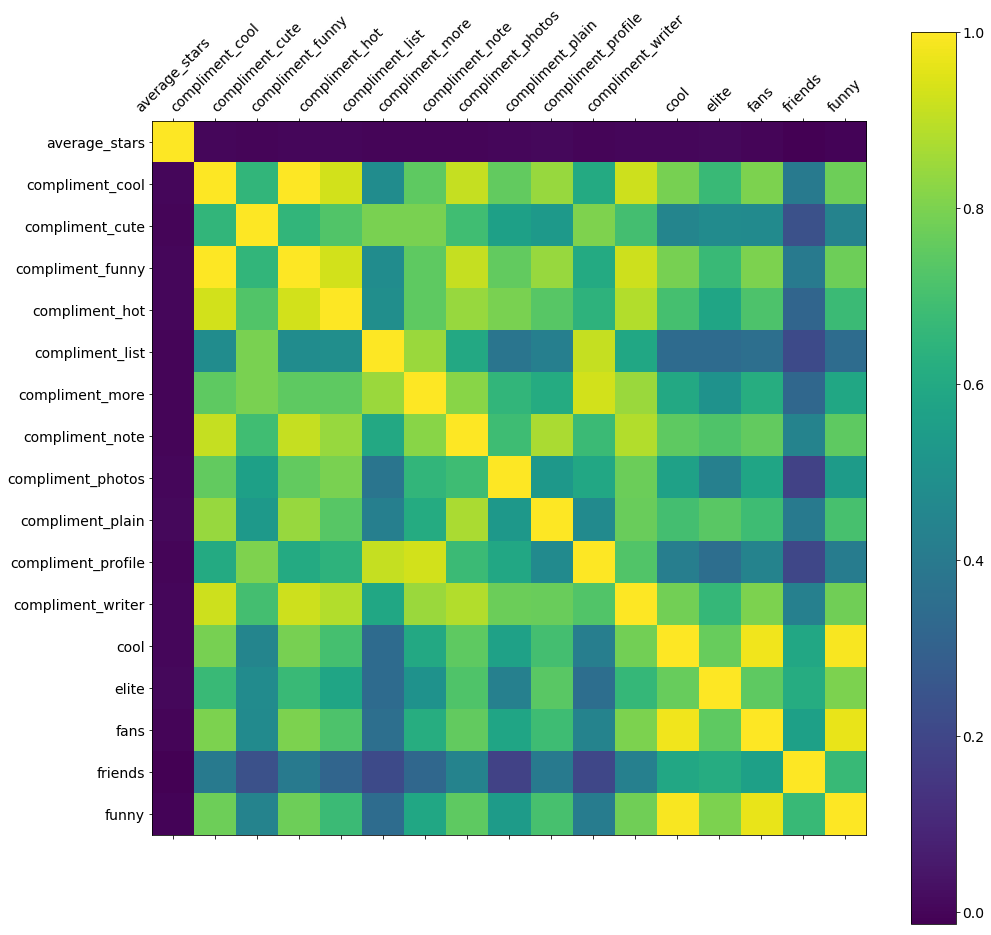

In [28]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(16, 16))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]-5), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]-5), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show()

In [202]:
import numpy as np
import matplotlib.ticker as mtick

def distribution_chart(col_name, steps, percent=True, xlabel_decimals=False, minv=float('-inf'), maxv=float('+inf')):
    df2 = df.copy().sort_values(by=[col_name])
    if minv != float('-inf'):
        df2 = df2.loc[(df2[col_name] >= minv)]
    if maxv != float('+inf'):
        df2 = df2.loc[(df2[col_name] <= maxv)]
        
    min_val = df2[[col_name]].min() if minv != float('-inf') else 0
    max_val = df2[[col_name]].max()
    size = df2[[col_name]].shape[0]
    res = [0 for i in range(steps)]

    for i, row in df2.iterrows():
        index = int((row[col_name]-min_val)*(steps-1)/(max_val-min_val))
        res[index] = res[index] + 1
    if percent:
        for i in range(len(res)):
            res[i] = float(res[i]*100)/float(size)
    print(res)

    fig, ax = plt.subplots(figsize=(15, 8))
    if percent:
        ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
    xlabel = '%.1f-%.1f' if xlabel_decimals else '%.0f-%.0f' 
    plt.bar([(xlabel % (float(i/(steps/(max_val-min_val))+min_val), 
                            float((i+1)/(steps/(max_val-min_val))+min_val))) for i in range(steps)], 
                res)
    plt.title("Distribution of " + col_name)
    plt.xticks(rotation=30)
    for i, v in enumerate(res):
        if percent:
            ax.text(i, v+0.5, ("%.2f%%" % v), horizontalalignment='center')
        else:
            ax.text(i, v+50, v, horizontalalignment='center')
    plt.show()

[0.0, 0.744, 0.378, 1.455, 3.893, 12.817, 32.347, 32.962, 10.806, 4.598]


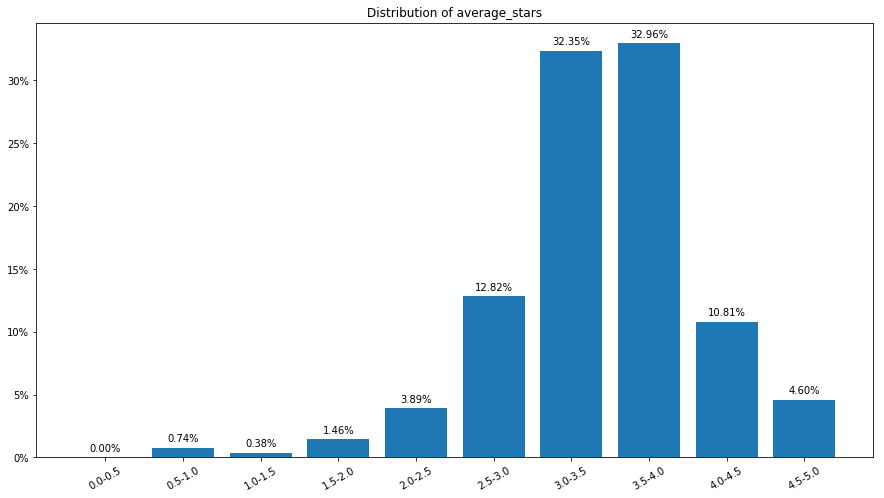

In [209]:
distribution_chart('average_stars', 10, xlabel_decimals=True)

[99.251, 0.638, 0.078, 0.015, 0.01, 0.001, 0.003, 0.0, 0.0, 0.001, 0.0, 0.002, 0.0, 0.001]


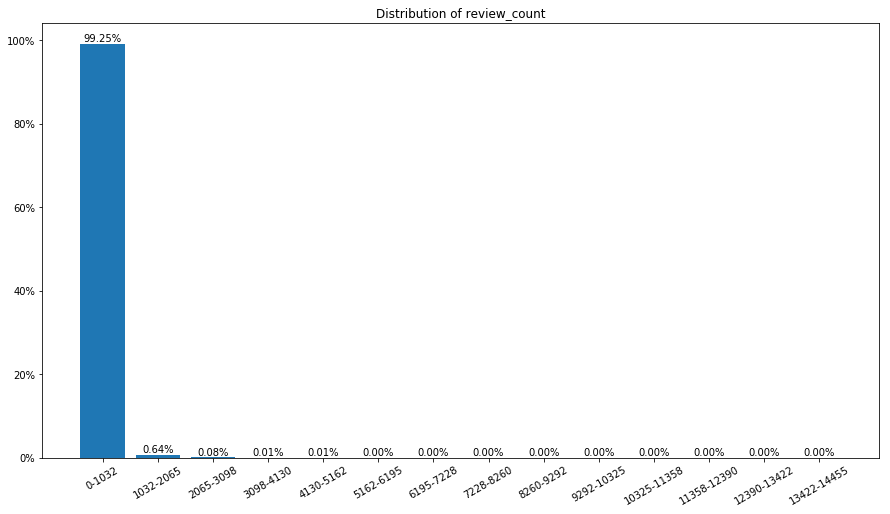

In [206]:
distribution_chart('review_count', 14)

[32.892382896162474, 22.91178471539799, 14.00332602615466, 9.258699322196184, 6.5021291606823395, 4.938644896313654, 3.7694963086149116, 3.0425580164789476, 2.4668027313729937, 0.21417592662584725]


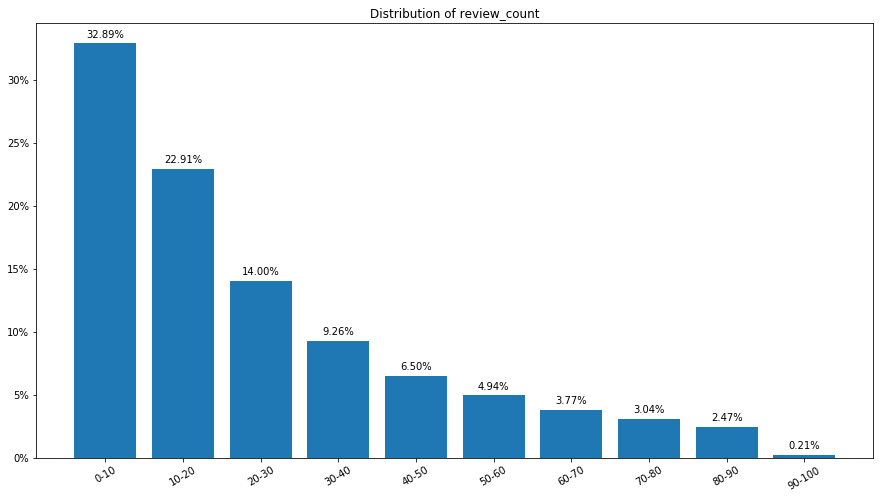

In [210]:
distribution_chart('review_count', 10, maxv=100)

[98.958, 0.68, 0.163, 0.067, 0.04, 0.025, 0.015, 0.011, 0.007, 0.008, 0.006, 0.004, 0.002, 0.0, 0.003, 0.002, 0.001, 0.002, 0.002, 0.001, 0.0, 0.0, 0.0, 0.001, 0.0, 0.001, 0.0, 0.0, 0.0, 0.001]


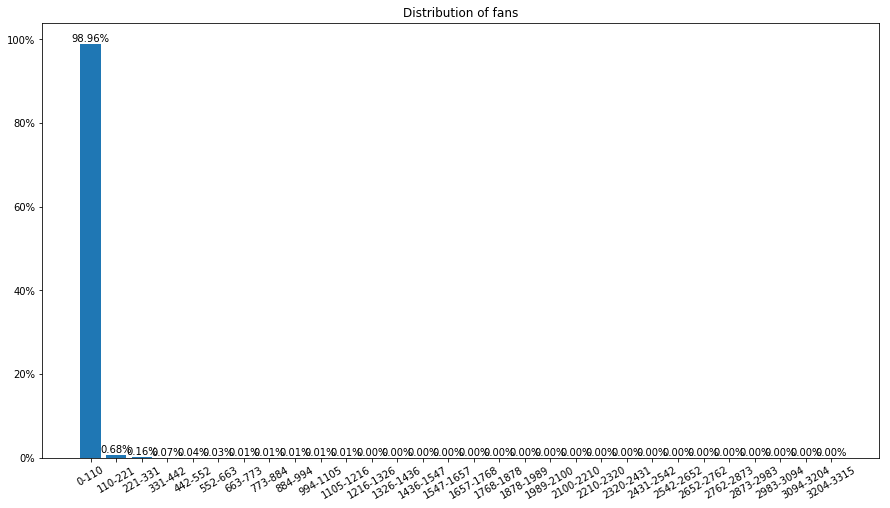

In [216]:
distribution_chart('fans', 30)

[81.70512224221957, 7.6226972154253705, 3.395280176336171, 1.9574932761723727, 1.0262684273321065, 0.9595357020080484, 0.6703605589371296, 0.5065620513235324, 0.4135406766293907, 0.2861418373743706, 0.31445269054215286, 0.2386200481284504, 0.16784291520899478, 0.1728984247032416, 0.10616569937918344, 0.15065418292855554, 0.1011101898849366, 0.11223231077227963, 0.07583264241370245, 0.017188732280439222]


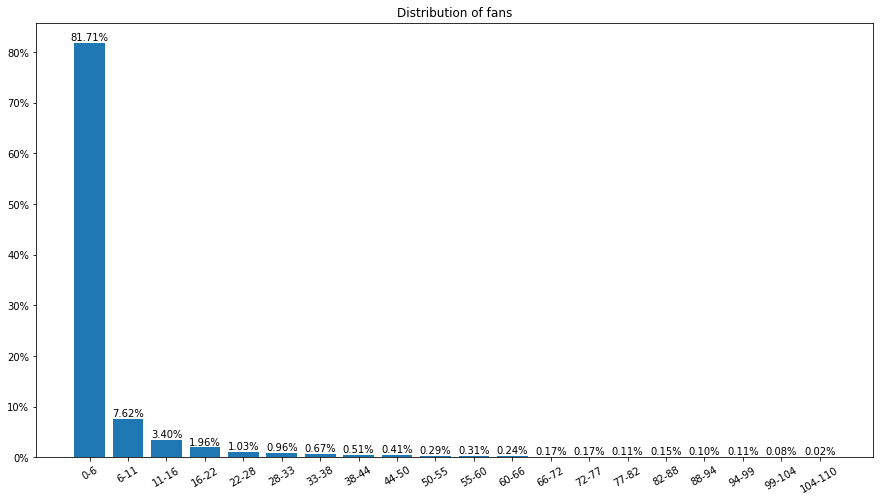

In [217]:
distribution_chart('fans', 20, maxv=110)

#### Scatter plot (review_count, average_stars)

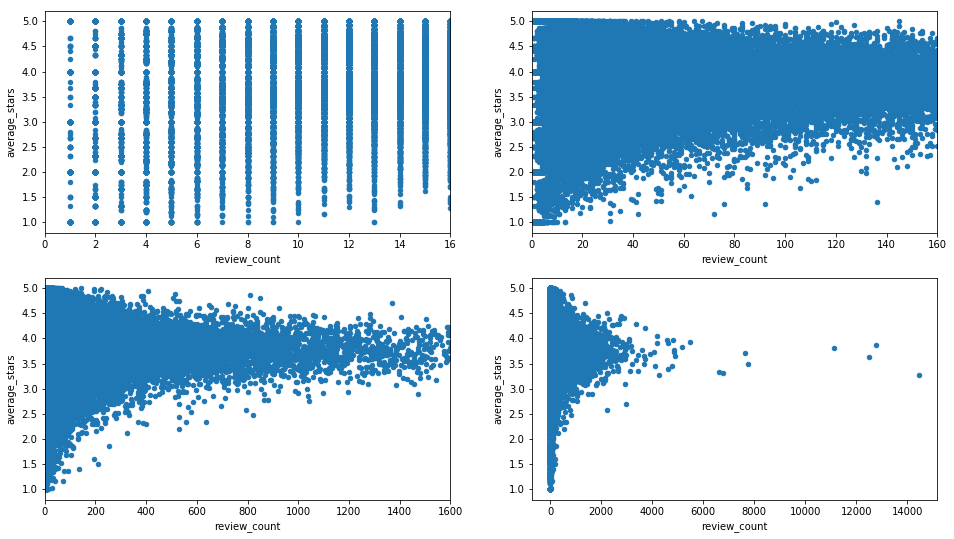

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,9))

axes[0][0].set_xlim(0, 16)
df.plot.scatter(x='review_count', y='average_stars', ax=axes[0][0])
axes[0][1].set_xlim(0, 160)
df.plot.scatter(x='review_count', y='average_stars', ax=axes[0][1])
axes[1][0].set_xlim(0, 1600)
df.plot.scatter(x='review_count', y='average_stars', ax=axes[1][0])
df.plot.scatter(x='review_count', y='average_stars', ax=axes[1][1])

#### Scatter plot (review_count, useful)

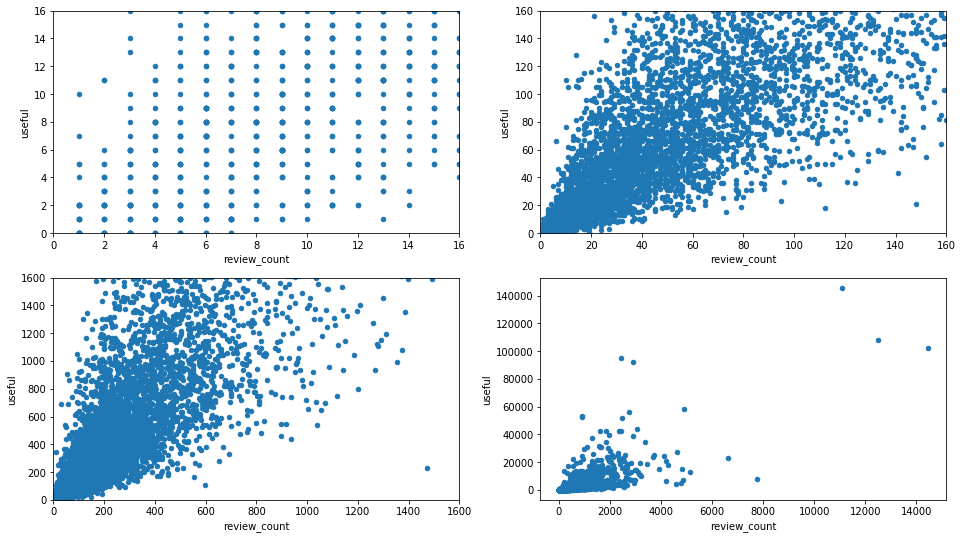

In [59]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,9))

axes[0][0].set_xlim(0, 16)
axes[0][0].set_ylim(0, 16)
df.plot.scatter(x='review_count', y='useful', ax=axes[0][0])
axes[0][1].set_xlim(0, 160)
axes[0][1].set_ylim(0, 160)
df.plot.scatter(x='review_count', y='useful', ax=axes[0][1])
axes[1][0].set_xlim(0, 1600)
axes[1][0].set_ylim(0, 1600)
df.plot.scatter(x='review_count', y='useful', ax=axes[1][0])
df.plot.scatter(x='review_count', y='useful', ax=axes[1][1])

#### Scatter plot (review_count, fans)

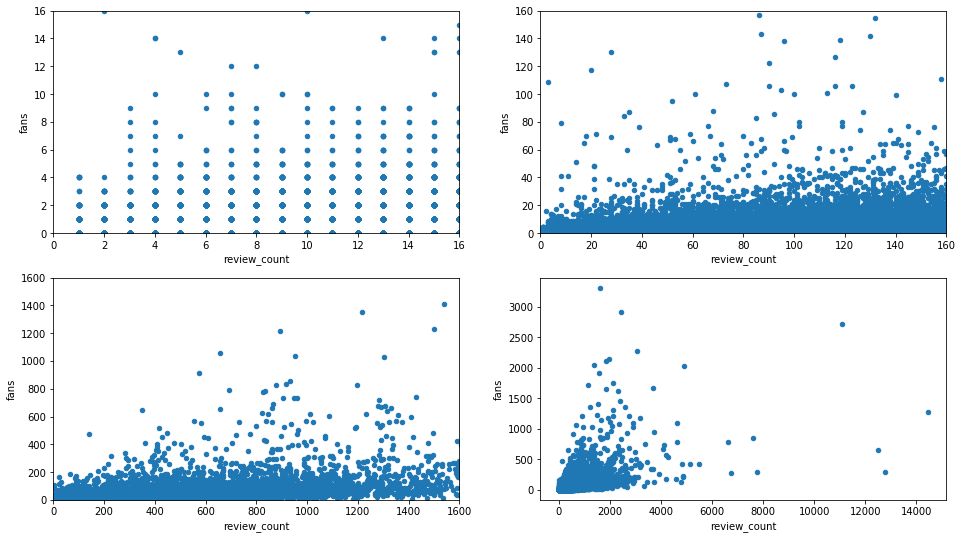

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,9))

axes[0][0].set_xlim(0, 16)
axes[0][0].set_ylim(0, 16)
df.plot.scatter(x='review_count', y='fans', ax=axes[0][0])
axes[0][1].set_xlim(0, 160)
axes[0][1].set_ylim(0, 160)
df.plot.scatter(x='review_count', y='fans', ax=axes[0][1])
axes[1][0].set_xlim(0, 1600)
axes[1][0].set_ylim(0, 1600)
df.plot.scatter(x='review_count', y='fans', ax=axes[1][0])
df.plot.scatter(x='review_count', y='fans', ax=axes[1][1])

#### "Compliment" metrics distribution

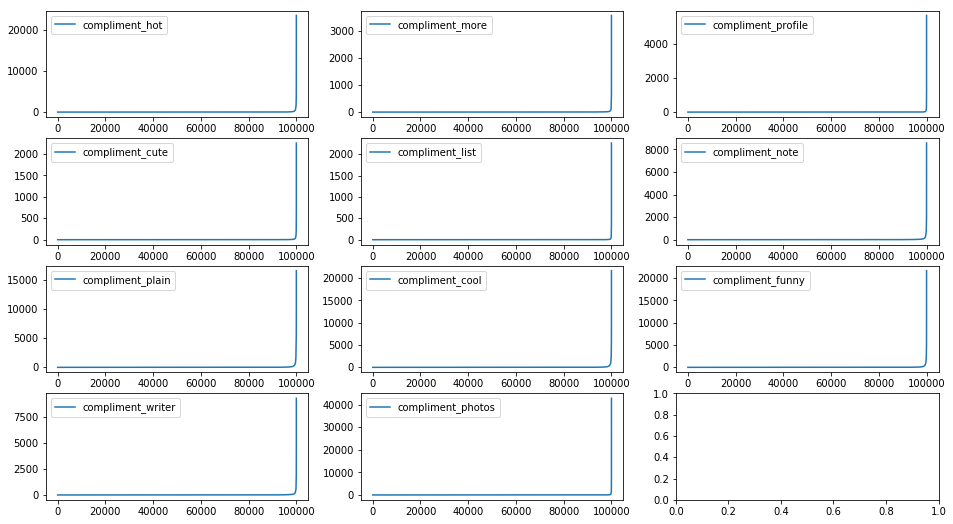

In [20]:
cols = ['compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute', 'compliment_list', 
        'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', 'compliment_writer', 
        'compliment_photos']

nc = 3
nr = int(len(cols)/nc)+1
fig, axes = plt.subplots(nrows=nr, ncols=nc, figsize=(16,9))

for i, col in enumerate(cols):
    comp = df[[col]].sort_values(by=[col])
    comp = comp.reset_index()[[col]]
    comp.plot.line(ax=axes[int(i/nc)][i-int(i/nc)*nc])